Nuha BinTayyash, 2020

This notebook shows the ROC and precision-recall curves resulted from running GPcounts with one sample test on simulated bulk RNA-seq datasets.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
from scipy import stats

In [2]:
DESeq2 = pd.read_csv('fission_DESeq2_ost_scaled.csv',index_col=[0])
print(DESeq2.shape)
GPcounts_NB = pd.read_csv('ll_Negative_binomial_wt_normalized_counts_scaled.csv',index_col=[0])
GPcounts_G = pd.read_csv('ll_Gaussian_wt_normalized_counts_scaled.csv',index_col=[0])
print(GPcounts_NB.shape)
print(GPcounts_G.shape)

(6459, 6)
(6459, 3)
(6459, 3)


In [3]:
DESeq_sorted = DESeq2.sort_values(by=['padj'])
DESeq_sorted = DESeq_sorted.drop(['SPAC186.05c'])
DESeq_sorted

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
SPBC2F12.09c,194.538295,2.248903,0.566691,1823.877023,0.000000e+00,0.000000e+00
SPAC19D5.01,785.112441,0.512240,0.241933,1378.228045,7.183368e-296,2.319510e-292
SPBC365.12c,2777.157909,1.426321,0.172215,1311.252966,2.330119e-281,5.015969e-278
SPCPB16A4.07,2330.086616,1.293065,0.278453,1092.090662,6.901209e-234,1.114200e-230
SPBC21C3.19,3351.602947,2.746294,0.224419,990.070391,8.483585e-212,1.095740e-208
...,...,...,...,...,...,...
SPBC1271.13,344.476103,-0.053453,0.209758,0.283744,9.979377e-01,9.985562e-01
SPAC343.18,187.167361,-0.040546,0.208468,0.270930,9.981543e-01,9.986182e-01
SPCC777.15,76.219994,-0.006933,0.402207,0.229976,9.987569e-01,9.989116e-01
SPBC28F2.05c,153.393201,-0.101474,0.370839,0.230511,9.987499e-01,9.989116e-01


In [4]:
GPcounts_NB_sorted = GPcounts_NB.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_NB_sorted = GPcounts_NB_sorted.drop(['SPAC186.05c'])
GPcounts_NB_sorted

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
SPBC2F12.09c,-79.029803,-1499.209431,1420.179628
SPBC1105.13c,-97.521623,-790.771660,693.250037
SPAC19D5.01,-114.097918,-725.458350,611.360432
SPNCRNA.1165,-82.640642,-587.092414,504.451771
SPBC725.03,-109.632490,-571.688016,462.055525
...,...,...,...
SPAC17D4.04,-147.710011,-133.487361,-14.222650
SPAC1834.03c,-176.233318,-161.986731,-14.246586
SPAC23D3.11,-141.074255,-125.854224,-15.220032
SPBC776.09,-146.991207,-130.541755,-16.449452


In [5]:
GPcounts_G_sorted = GPcounts_G.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_G_sorted = GPcounts_G_sorted.drop(['SPAC186.05c'])
GPcounts_G_sorted

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
SPAC19D5.01,-15.597537,-36.979781,21.382244
SPBC365.12c,-11.518583,-31.909273,20.390690
SPBC725.03,-12.831571,-32.257156,19.425585
SPBC2F12.09c,-21.897779,-41.154533,19.256754
SPBC21C3.19,-16.442299,-35.640826,19.198527
...,...,...,...
SPAPB24D3.01,-17.427080,-7.247095,-10.179986
SPBC29A3.07c,-14.334318,-3.990367,-10.343951
SPAC1002.15c,-16.802880,-6.340854,-10.462026
SPBC428.12c,-14.541660,-3.719908,-10.821752


sort GPcounts results according to DESeq2 

In [6]:
GPcounts_NB_DESeq_sorted = GPcounts_NB.reindex(list(DESeq_sorted.index.values))
GPcounts_NB_DESeq_sorted 

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
SPBC2F12.09c,-79.029803,-1499.209431,1420.179628
SPAC19D5.01,-114.097918,-725.458350,611.360432
SPBC365.12c,-163.035587,-164.569890,1.534303
SPCPB16A4.07,-133.031258,-535.695159,402.663901
SPBC21C3.19,-146.014229,-556.458423,410.444194
...,...,...,...
SPBC1271.13,-101.967087,-101.956860,-0.010227
SPAC343.18,-89.823496,-89.945202,0.121706
SPCC777.15,-86.475883,-86.490434,0.014551
SPBC28F2.05c,-98.954804,-98.954655,-0.000148


In [7]:
GPcounts_G_DESeq_sorted = GPcounts_G.reindex(list(DESeq_sorted.index.values))
GPcounts_G_DESeq_sorted

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
SPBC2F12.09c,-21.897779,-41.154533,1.925675e+01
SPAC19D5.01,-15.597537,-36.979781,2.138224e+01
SPBC365.12c,-11.518583,-31.909273,2.039069e+01
SPCPB16A4.07,-20.725368,-39.632772,1.890740e+01
SPBC21C3.19,-16.442299,-35.640826,1.919853e+01
...,...,...,...
SPBC1271.13,2.696964,2.697020,-5.529963e-05
SPAC343.18,3.972107,3.972254,-1.462619e-04
SPCC777.15,-9.273692,-9.273662,-3.038987e-05
SPBC28F2.05c,-10.853131,-10.853130,-7.402482e-07


{0.0: 2945, 1.0: 3513}
{0.0: 2528, 1.0: 3930}
{0.0: 2028, 1.0: 4430}


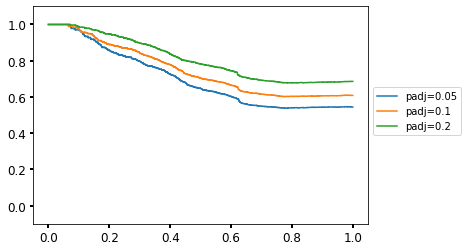

{0.0: 2945, 1.0: 3513}
{0.0: 2528, 1.0: 3930}
{0.0: 2028, 1.0: 4430}


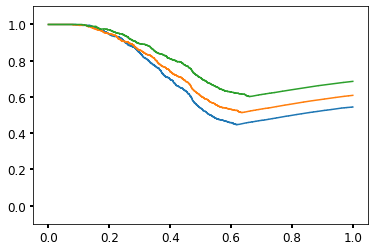

In [8]:
padj = [.05,.1,.2]
DESeq_id = list(DESeq_sorted.index.values)
fig = plt.figure()

dfs = [GPcounts_NB_DESeq_sorted['log_likelihood_ratio'],GPcounts_G_DESeq_sorted['log_likelihood_ratio']]
D = len(DESeq_sorted)

for df in range(len(dfs)):
    D = len(DESeq_sorted)
    for i in range(3):
        true_label = np.zeros(D)
  

        for j in range(D):
            if DESeq_sorted['padj'][j] <= padj[i]:
                true_label[j] = 1

        labels = pd.DataFrame(true_label, index =DESeq_sorted.index.values, columns =['label'])
        
        unique, counts = np.unique(true_label, return_counts=True)
        
        print(dict(zip(unique, counts)))
        precision, recall, thresholds = metrics.precision_recall_curve(labels['label'],dfs[df])

        plt.plot( recall,precision,label='padj='+str(padj[i]))
        plt.tick_params(labelsize='large', width=2) 
        '''
        plt.xlabel('recall')
        plt.ylabel('precision')
        plt.legend(loc='best', bbox_to_anchor=(1.22, .75))
        '''
        if df == 0:
            plt.legend(loc='best', bbox_to_anchor=(1., .65))
        
            #title = 'GPcounts with NB likelihood'
        '''
        else:
            title = 'GPcounts with Gaussian likelihood'
            
        plt.title(title )
        '''
        plt.ylim([-.1,1.1])
        
    plt.show()
